## 統計學習初論 期末專案 -- 台灣超級籃球聯賽球員類型分群與球隊戰績討論
### 簡介
在籃球界裡，我們習慣將球員分成五種：控球後衛(Point guard)、得分後衛(Shooting guard)、小前鋒(Small forward)、大前鋒(Power forward)、中鋒(Center)，但隨著時代的演變，這樣的分類已經漸漸失去意義，往往相同位置的球員卻有著完全不同的特性與能力，故我們希望藉由超級籃球聯賽(SBL)官方網站所提供的球員數據，以這些數據來將球員的分群做的更為仔細，如：將同為後衛的球員分為進攻型、防守型、綜合型，抑或是對於球員的分類有新的定義，如：明星球員類。		
接著再以分好群的球員，來針對每年戰績較佳、奪冠隊伍、國家隊伍來進行隊伍組成的檢視，並加以觀察近年較佳球隊的球員類型的變化，或是國家隊徵招的陣容是否合宜以及改進的可能性。

### 資料來源
[超級籃球聯賽官方網站](https://sbl.choxue.com/)

### 步驟
#### Frame the problem and look at the big picture.
* 台灣籃球員分類
* 冠軍隊伍組成
* 國家隊伍組成

#### Get the data.
* 爬蟲
    [超級籃球聯賽官方網站](https://sbl.choxue.com/)

#### Explore the data to gain insights.（淺顯易懂的資料解釋）
* 放散布圖（E.g.表現好的球員：上場時間比較多）

#### Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
* data preprocessing (增加維度：生出進階 by 公式)
* dimension reduction by LDA or PCA.

#### Explore many different models and short-list the best ones.
* different ways of clustering? 不同種類之k-means
* random forest
* HAC
* HAC + k-means

#### Fine-tune your models and combine them into a great solution. Present your solution.
* visualize the result (by tableau?)

#### Launch, monitor, and maintain your system.

---

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import os
import pandas as pd
import numpy as np

ChineseFont2 = FontProperties(fname='./MingLiU.ttf')

df = pd.read_csv('player_cleanV6_3.csv', encoding = 'big5')

### 取出需要的feature，將G, F, C轉成0, 1, 2。

In [70]:
xtrain = df[['Nationality',
             'CTteam',
             'Height',
             'Weight',
             'ptsPG',
             'rebPG',
             'astPG',
             'toPG',
             'stlPG',
             'blkPG',
             'pfPG',
             '2ptsPercentage',
             '3ptsPercentage',
             'ftPercentage',
             'fgPercentage',
             '2ptsM_PG',
             '2ptsA_PG',
             '3ptsM_PG',
             '3ptsA_PG',
             'ftM_PG',
             'ftA_PG',
             'fgM_PG',
             'fgA_PG'
             #'EFF',
             #'eFG',
             #'TS',
             #'TOV'
]]
# 進階數據有共線性

pos2num = {'G':0, 'F':1, 'C':2}
ytrain = [pos2num[i] for i in df['Pos']]

### 標準化

In [71]:
xtrainstd = pd.DataFrame()
xtrainstd['Nationality'] = df['Nationality'].copy()
xtrainstd['CTteam'] = df['CTteam'].copy()
xtrainstd['Height'] = (df['Height'] - df['Height'].mean())/df['Height'].std()
xtrainstd['Weight'] = (df['Weight'] - df['Weight'].mean())/df['Weight'].std()
xtrainstd['ptsPG'] = (df['ptsPG'] - df['ptsPG'].mean())/df['ptsPG'].std()
xtrainstd['rebPG'] = (df['rebPG'] - df['rebPG'].mean())/df['rebPG'].std()
xtrainstd['astPG'] = (df['astPG'] - df['astPG'].mean())/df['astPG'].std()
xtrainstd['toPG'] = (df['toPG'] - df['toPG'].mean())/df['toPG'].std()
xtrainstd['stkPG'] = (df['stlPG'] - df['stlPG'].mean())/df['stlPG'].std()
xtrainstd['blkPG'] = (df['blkPG'] - df['blkPG'].mean())/df['blkPG'].std()
xtrainstd['pfPG'] = (df['pfPG'] - df['pfPG'].mean())/df['pfPG'].std()
xtrainstd['2ptsPercentage'] = df['2ptsPercentage'].copy()
xtrainstd['3ptsPercentage'] = df['3ptsPercentage'].copy()
xtrainstd['ftPercentage'] = df['ftPercentage'].copy()
xtrainstd['fgPercentage'] = df['fgPercentage'].copy()
xtrainstd['2ptsM_PG'] = (df['2ptsM_PG'] - df['2ptsM_PG'].mean())/df['2ptsM_PG'].std()
xtrainstd['2ptsA_PG'] = (df['2ptsA_PG'] - df['2ptsA_PG'].mean())/df['2ptsA_PG'].std()
xtrainstd['3ptsM_PG'] = (df['3ptsM_PG'] - df['3ptsM_PG'].mean())/df['3ptsM_PG'].std()
xtrainstd['3ptsA_PG'] = (df['3ptsA_PG'] - df['3ptsA_PG'].mean())/df['3ptsA_PG'].std()
xtrainstd['ftM_PG'] = (df['ftM_PG'] - df['ftM_PG'].mean())/df['ftM_PG'].std()
xtrainstd['ftA_PG'] = (df['ftA_PG'] - df['ftA_PG'].mean())/df['ftA_PG'].std()
xtrainstd['fgM_PG'] = (df['fgM_PG'] - df['fgM_PG'].mean())/df['fgM_PG'].std()
xtrainstd['fgA_PG'] = (df['fgA_PG'] - df['fgA_PG'].mean())/df['fgA_PG'].std()
# xtrainstd['EFF'] = (df['EFF'] - df['EFF'].mean())/df['EFF'].std()
# xtrainstd['eFG'] = (df['eFG'] - df['eFG'].mean())/df['eFG'].std()
# xtrainstd['TS'] = (df['TS'] - df['TS'].mean())/df['TS'].std()
# xtrainstd['TOV'] = (df['TOV'] - df['TOV'].mean())/df['TOV'].std()

# 1. LDA + K-means

### 用LDA降維(利用原本的位置G, F, C當作label)

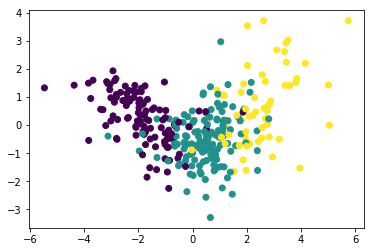

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(xtrainstd, ytrain)

x_lda = lda.transform(xtrainstd)
plt.scatter(x_lda[:, 0], x_lda[:, 1],marker='o',c=ytrain, label=ytrain)
plt.show()

### KMeans

In [73]:
from sklearn.cluster import KMeans

n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(x_lda)
Pos_new = kmeans.labels_

df_lda = df[['Name']].copy()
df_lda = pd.concat([df_lda, pd.DataFrame(x_lda)], axis=1)
df_lda['Pos_new'] = Pos_new
df_lda.columns = ['Name', 'Dim_1', 'Dim_2', 'New_pos']

### 繪圖函式

In [74]:
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))

def plot_result(x, y, name, colorid, addname = True, fontsize = 6, markersize = 20,
                dpi = 200, datascale = 1.0, outfn = 'untitled.png', title = None, nameshift = 0.05):
    
    x = x * datascale
    y = y * datascale

    fig, ax = plt.subplots(dpi = dpi)
    #ax.scatter(x, y, s = markersize, c = colorid, cmap=plt.cm.get_cmap('rainbow'), alpha = 0.8)
    if title != None:
        ax.set_title(title)
    ax.scatter(x, y, s = markersize, color = colorid, alpha = 0.8)

    if addname == True:
        for i, txt in enumerate(name):
            ax.annotate(txt, (x[i] + nameshift, y[i]), size = fontsize, color = 'gray', fontproperties=ChineseFont2)
    #plt.show()
    #plt.savefig('univdep.svg')
    
    plt.savefig(outfn)

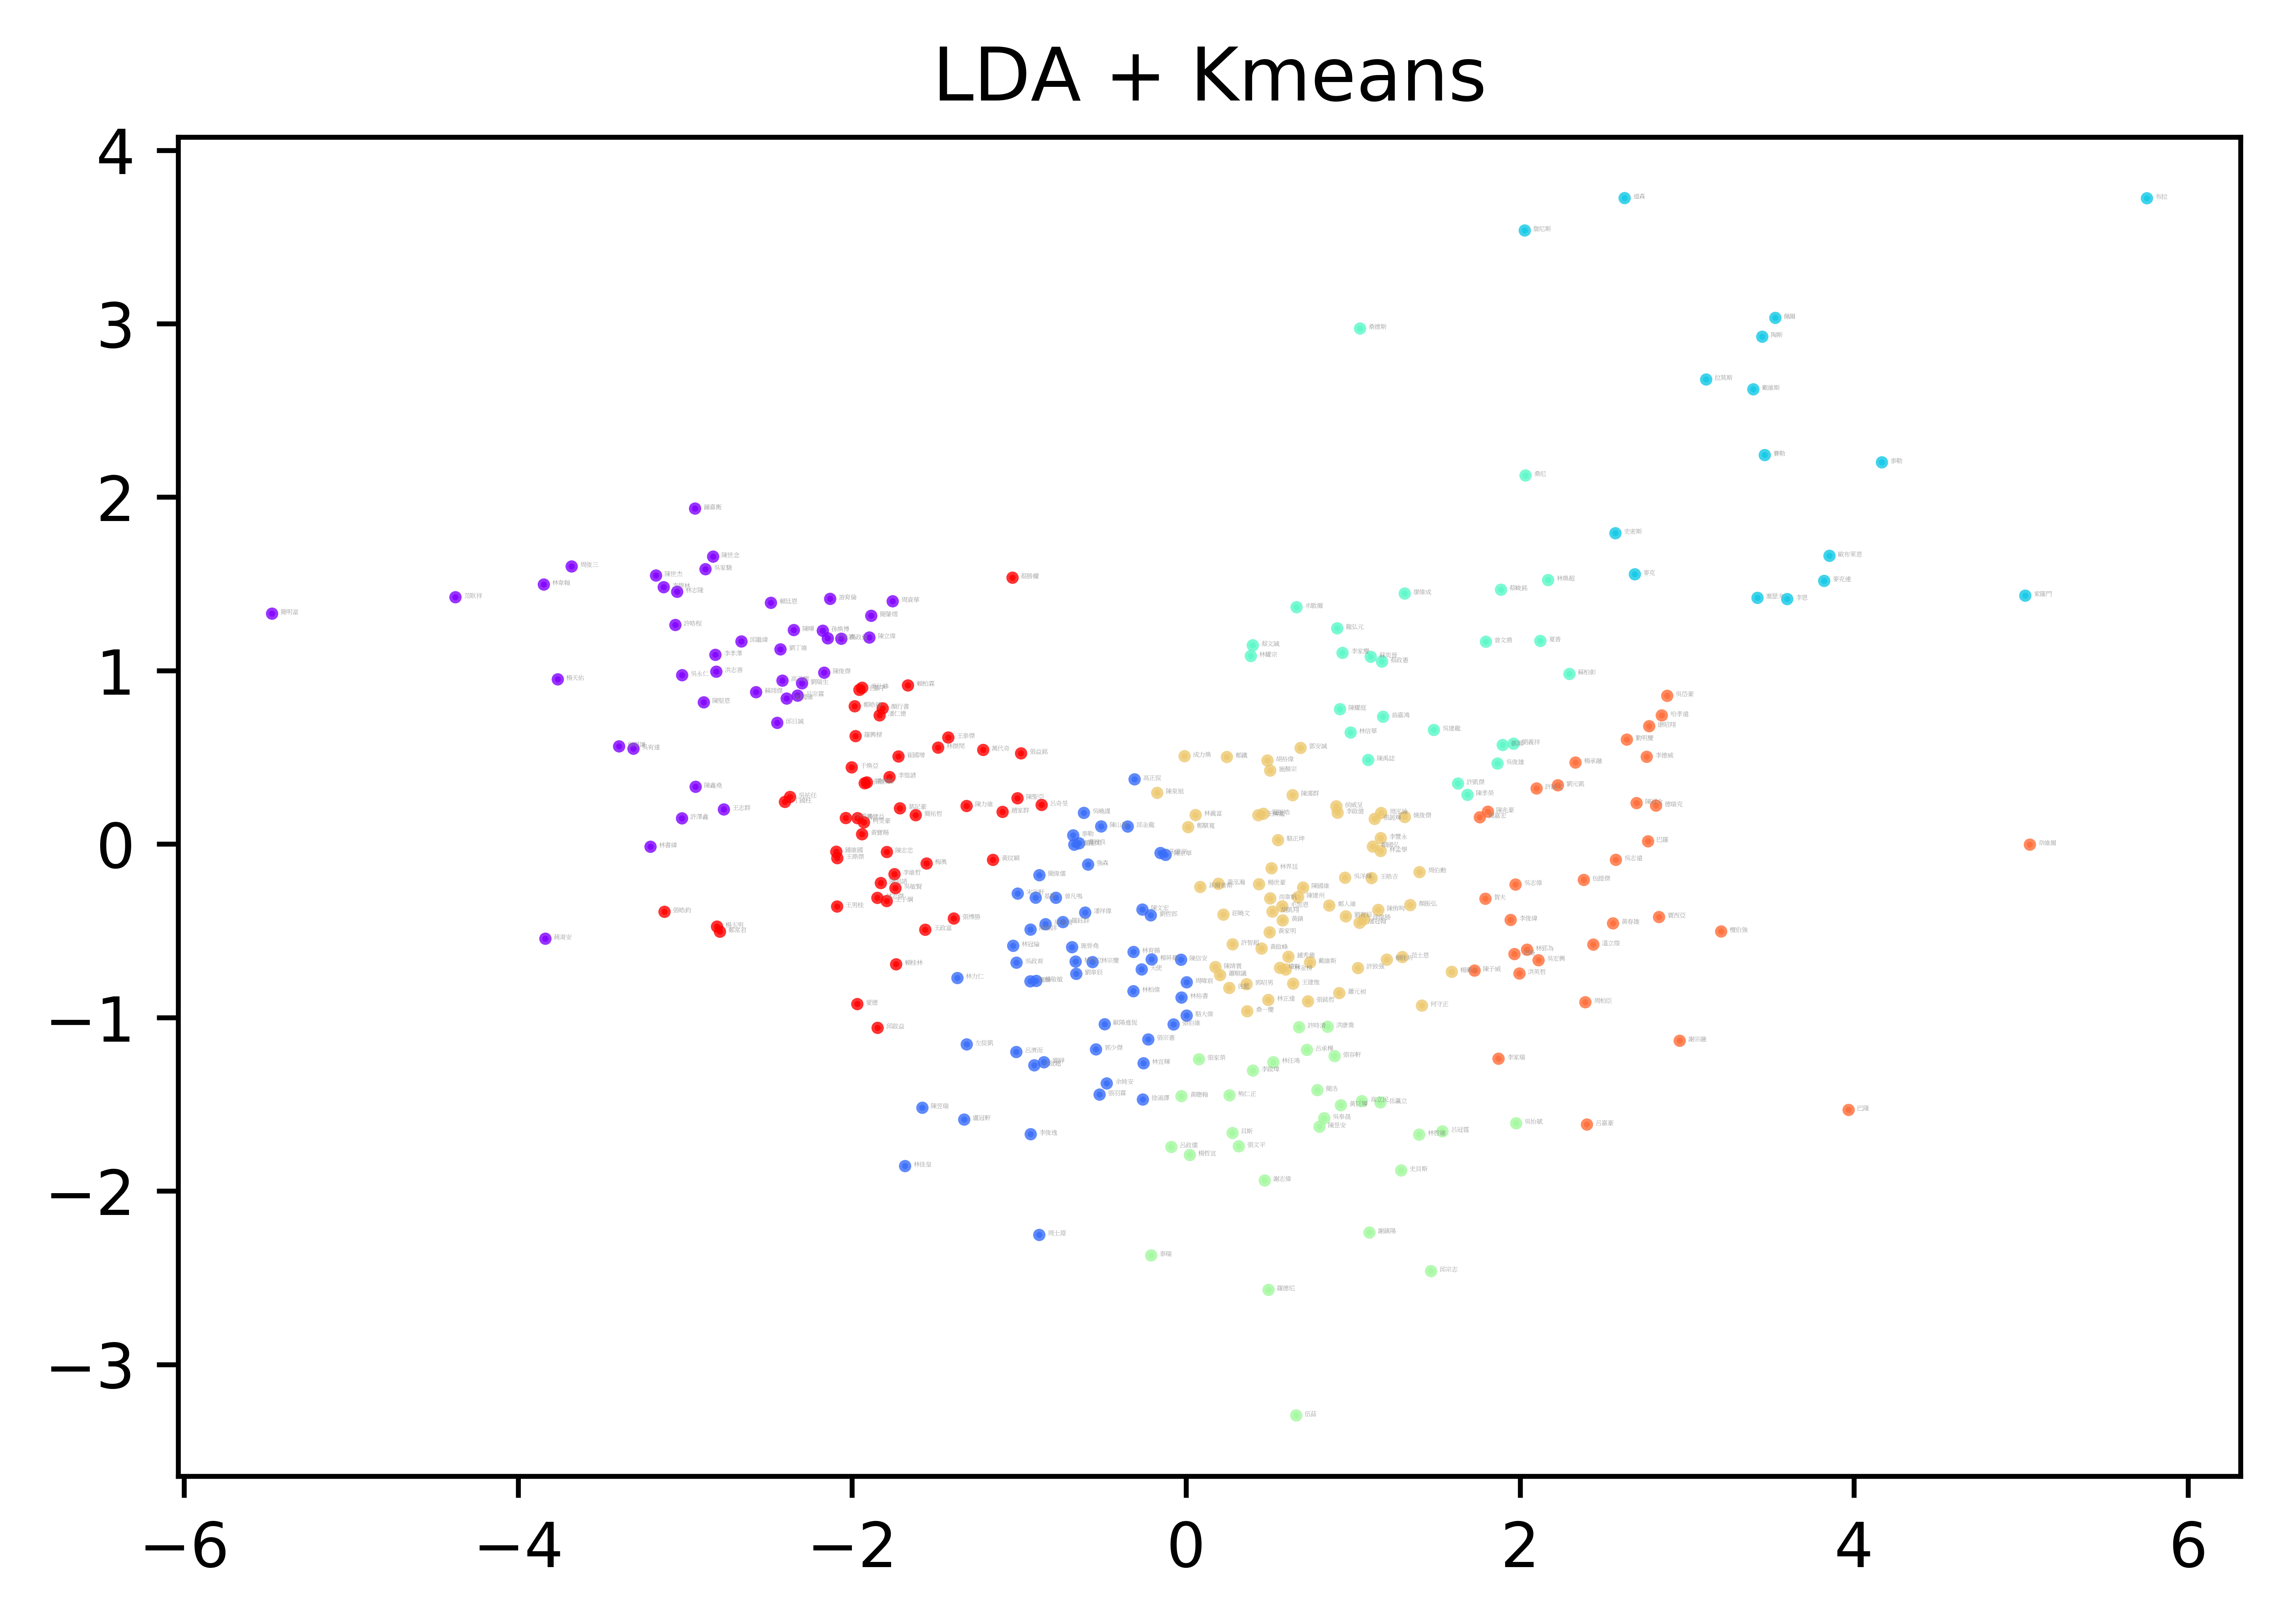

In [75]:
clus_col = colors[df_lda.New_pos.values]

plot_result(df_lda['Dim_1'], df_lda['Dim_2'],
            df_lda['Name'], clus_col, addname = True, fontsize = 1, 
            title = 'LDA + Kmeans',
            markersize= 1, dpi = 1200, datascale = 1, outfn = 'LDA_Kmeans.png')

# 2. TSNE + K-means

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 307 samples in 0.000s...
[t-SNE] Computed neighbors for 307 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 307 / 307
[t-SNE] Mean sigma: 0.147266
[t-SNE] KL divergence after 250 iterations with early exaggeration: 186.928635
[t-SNE] KL divergence after 1000 iterations: 0.588436


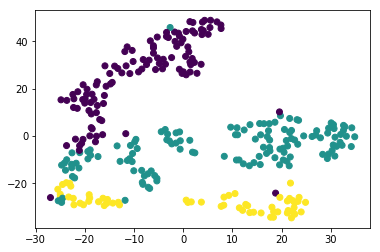

In [76]:
from sklearn.manifold import TSNE

xtrainstd['G'] = df['G'].copy()
xtrainstd['F'] = df['F'].copy()
xtrainstd['C'] = df['C'].copy()

np.random.seed(1001)
tsne_cos = TSNE(n_components=2, early_exaggeration=30, verbose=1, metric = 'cosine', perplexity=10, learning_rate=15)
x_tsne_cos = tsne_cos.fit_transform(xtrainstd)

plt.scatter(x_tsne_cos[:, 0], x_tsne_cos[:, 1],marker='o',c=ytrain, label=ytrain)
plt.show()

In [77]:
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(x_tsne_cos)
Pos_new = kmeans.labels_

df_tsne_cos = df[['Name']].copy()
df_tsne_cos = pd.concat([df_tsne_cos, pd.DataFrame(x_tsne_cos)], axis=1)
df_tsne_cos['Pos_new'] = Pos_new
df_tsne_cos.columns = ['Name', 'Dim_1', 'Dim_2', 'New_pos']

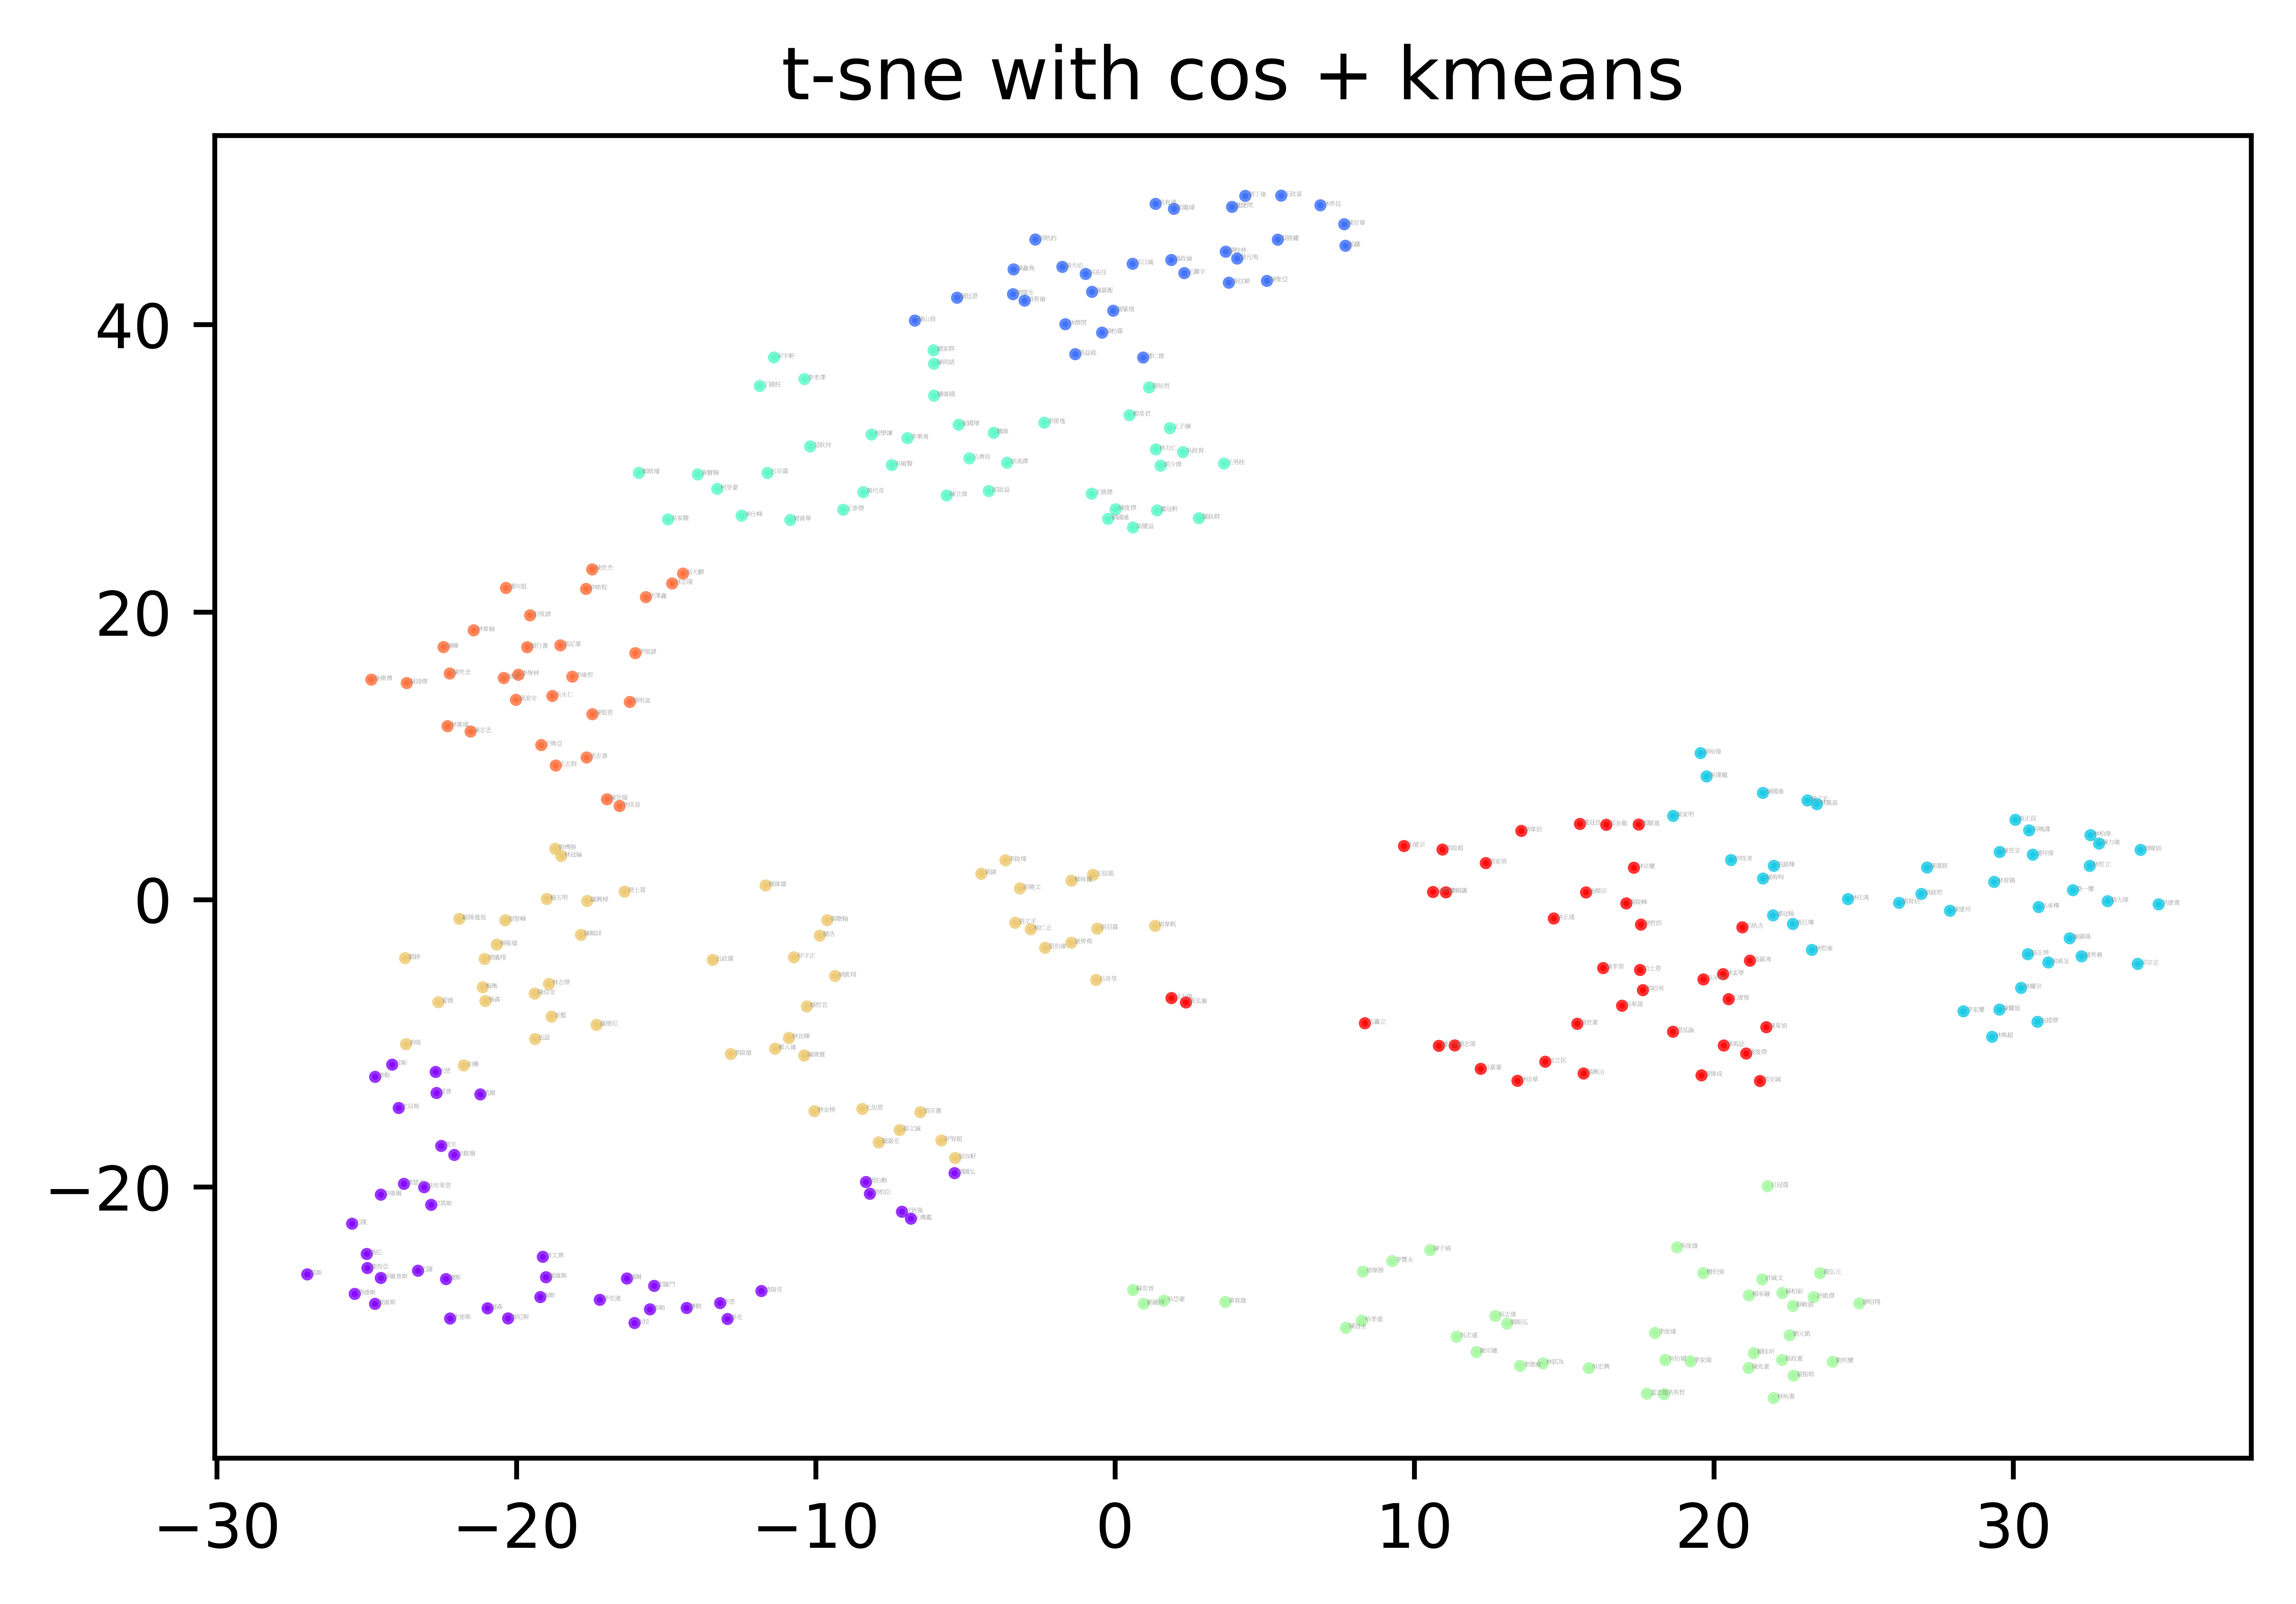

In [78]:
clus_col = colors[df_tsne_cos.New_pos.values]

plot_result(df_tsne_cos['Dim_1'], df_tsne_cos['Dim_2'],
            df_tsne_cos['Name'], clus_col, addname = True, fontsize = 1, 
            title = 't-sne with cos + kmeans',
            markersize= 1, dpi = 1200, datascale = 1, outfn = 'tsnecos_kmeans.png', nameshift = 0.1)

# 3. PCA + K-means

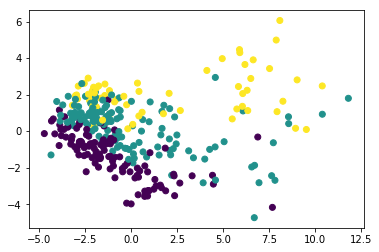

In [79]:
# pca + k-means
xtrainstd

from sklearn.decomposition import PCA 
pca=PCA(n_components=2, copy=True)
x_pca=pca.fit_transform(xtrainstd)
plt.scatter(x_pca[:, 0], x_pca[:, 1],marker='o',c=ytrain, label=ytrain)
plt.show()

In [80]:
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(x_pca)
Pos_new = kmeans.labels_

df_pca = df[['Name']].copy()
df_pca = pd.concat([df_pca, pd.DataFrame(x_pca)], axis=1)
df_pca['Pos_new'] = Pos_new
df_pca.columns = ['Name', 'Dim_1', 'Dim_2', 'New_pos']

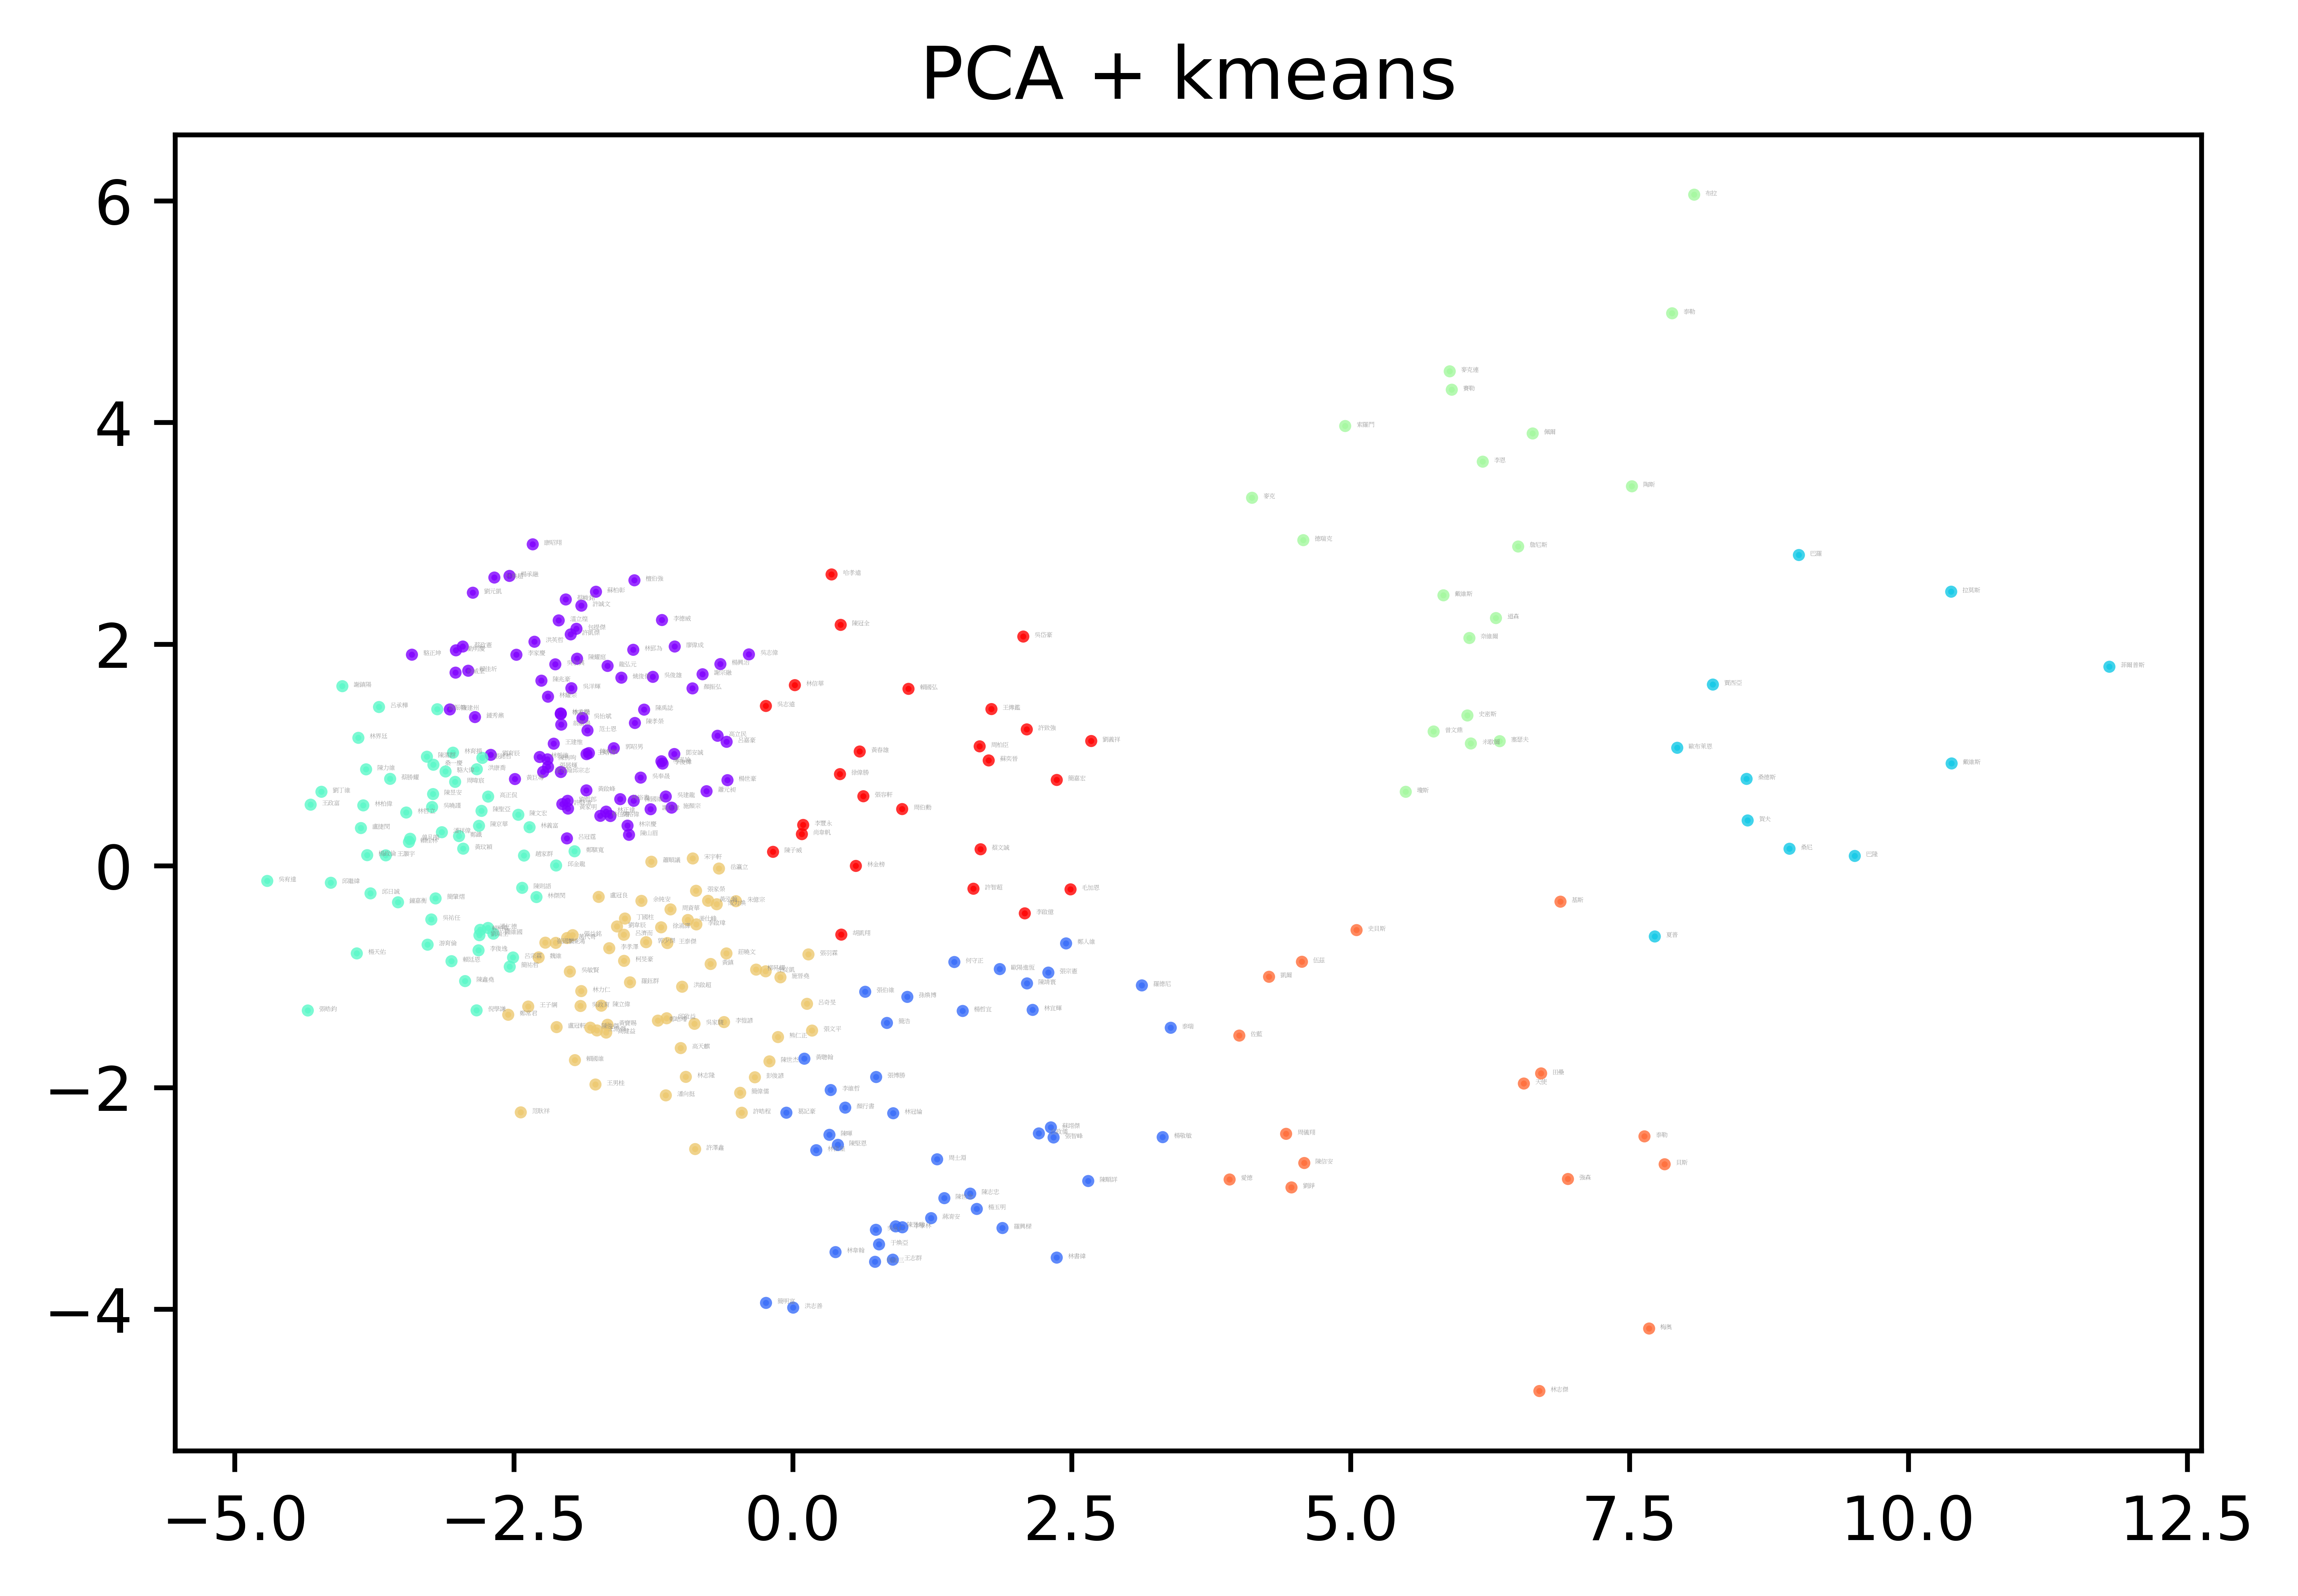

In [81]:
clus_col = colors[df_pca.New_pos.values]

plot_result(df_pca['Dim_1'], df_pca['Dim_2'],
            df_pca['Name'], clus_col, addname = True, fontsize = 1, 
            title = 'PCA + kmeans',
            markersize= 1, dpi = 1200, datascale = 1, outfn = 'PCA_kmeans.png', nameshift = 0.1)

# 4. LDA + HAC

In [91]:
xtrainstd = pd.DataFrame()
xtrainstd['Nationality'] = df['Nationality'].copy()
xtrainstd['CTteam'] = df['CTteam'].copy()
xtrainstd['Height'] = (df['Height'] - df['Height'].mean())/df['Height'].std()
xtrainstd['Weight'] = (df['Weight'] - df['Weight'].mean())/df['Weight'].std()
xtrainstd['ptsPG'] = (df['ptsPG'] - df['ptsPG'].mean())/df['ptsPG'].std()
xtrainstd['rebPG'] = (df['rebPG'] - df['rebPG'].mean())/df['rebPG'].std()
xtrainstd['astPG'] = (df['astPG'] - df['astPG'].mean())/df['astPG'].std()
xtrainstd['toPG'] = (df['toPG'] - df['toPG'].mean())/df['toPG'].std()
xtrainstd['stkPG'] = (df['stlPG'] - df['stlPG'].mean())/df['stlPG'].std()
xtrainstd['blkPG'] = (df['blkPG'] - df['blkPG'].mean())/df['blkPG'].std()
xtrainstd['pfPG'] = (df['pfPG'] - df['pfPG'].mean())/df['pfPG'].std()
xtrainstd['2ptsPercentage'] = df['2ptsPercentage'].copy()
xtrainstd['3ptsPercentage'] = df['3ptsPercentage'].copy()
xtrainstd['ftPercentage'] = df['ftPercentage'].copy()
xtrainstd['fgPercentage'] = df['fgPercentage'].copy()
xtrainstd['2ptsM_PG'] = (df['2ptsM_PG'] - df['2ptsM_PG'].mean())/df['2ptsM_PG'].std()
xtrainstd['2ptsA_PG'] = (df['2ptsA_PG'] - df['2ptsA_PG'].mean())/df['2ptsA_PG'].std()
xtrainstd['3ptsM_PG'] = (df['3ptsM_PG'] - df['3ptsM_PG'].mean())/df['3ptsM_PG'].std()
xtrainstd['3ptsA_PG'] = (df['3ptsA_PG'] - df['3ptsA_PG'].mean())/df['3ptsA_PG'].std()
xtrainstd['ftM_PG'] = (df['ftM_PG'] - df['ftM_PG'].mean())/df['ftM_PG'].std()
xtrainstd['ftA_PG'] = (df['ftA_PG'] - df['ftA_PG'].mean())/df['ftA_PG'].std()
xtrainstd['fgM_PG'] = (df['fgM_PG'] - df['fgM_PG'].mean())/df['fgM_PG'].std()
xtrainstd['fgA_PG'] = (df['fgA_PG'] - df['fgA_PG'].mean())/df['fgA_PG'].std()
# xtrainstd['EFF'] = (df['EFF'] - df['EFF'].mean())/df['EFF'].std()
# xtrainstd['eFG'] = (df['eFG'] - df['eFG'].mean())/df['eFG'].std()
# xtrainstd['TS'] = (df['TS'] - df['TS'].mean())/df['TS'].std()
# xtrainstd['TOV'] = (df['TOV'] - df['TOV'].mean())/df['TOV'].std()

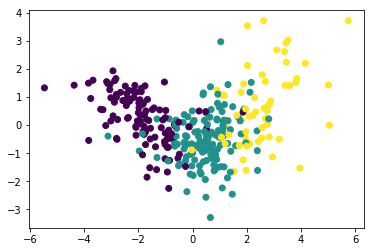

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(xtrainstd, ytrain)

x_lda = lda.transform(xtrainstd)
plt.scatter(x_lda[:, 0], x_lda[:, 1],marker='o',c=ytrain, label=ytrain)
plt.show()

In [94]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=8).fit(x_lda)
clustering.labels_
Pos_new = clustering.labels_

df_lda = df[['Name']].copy()
df_lda = pd.concat([df_lda, pd.DataFrame(x_lda)], axis=1)
df_lda['Pos_new'] = Pos_new
df_lda.columns = ['Name', 'Dim_1', 'Dim_2', 'New_pos']

# df_lda

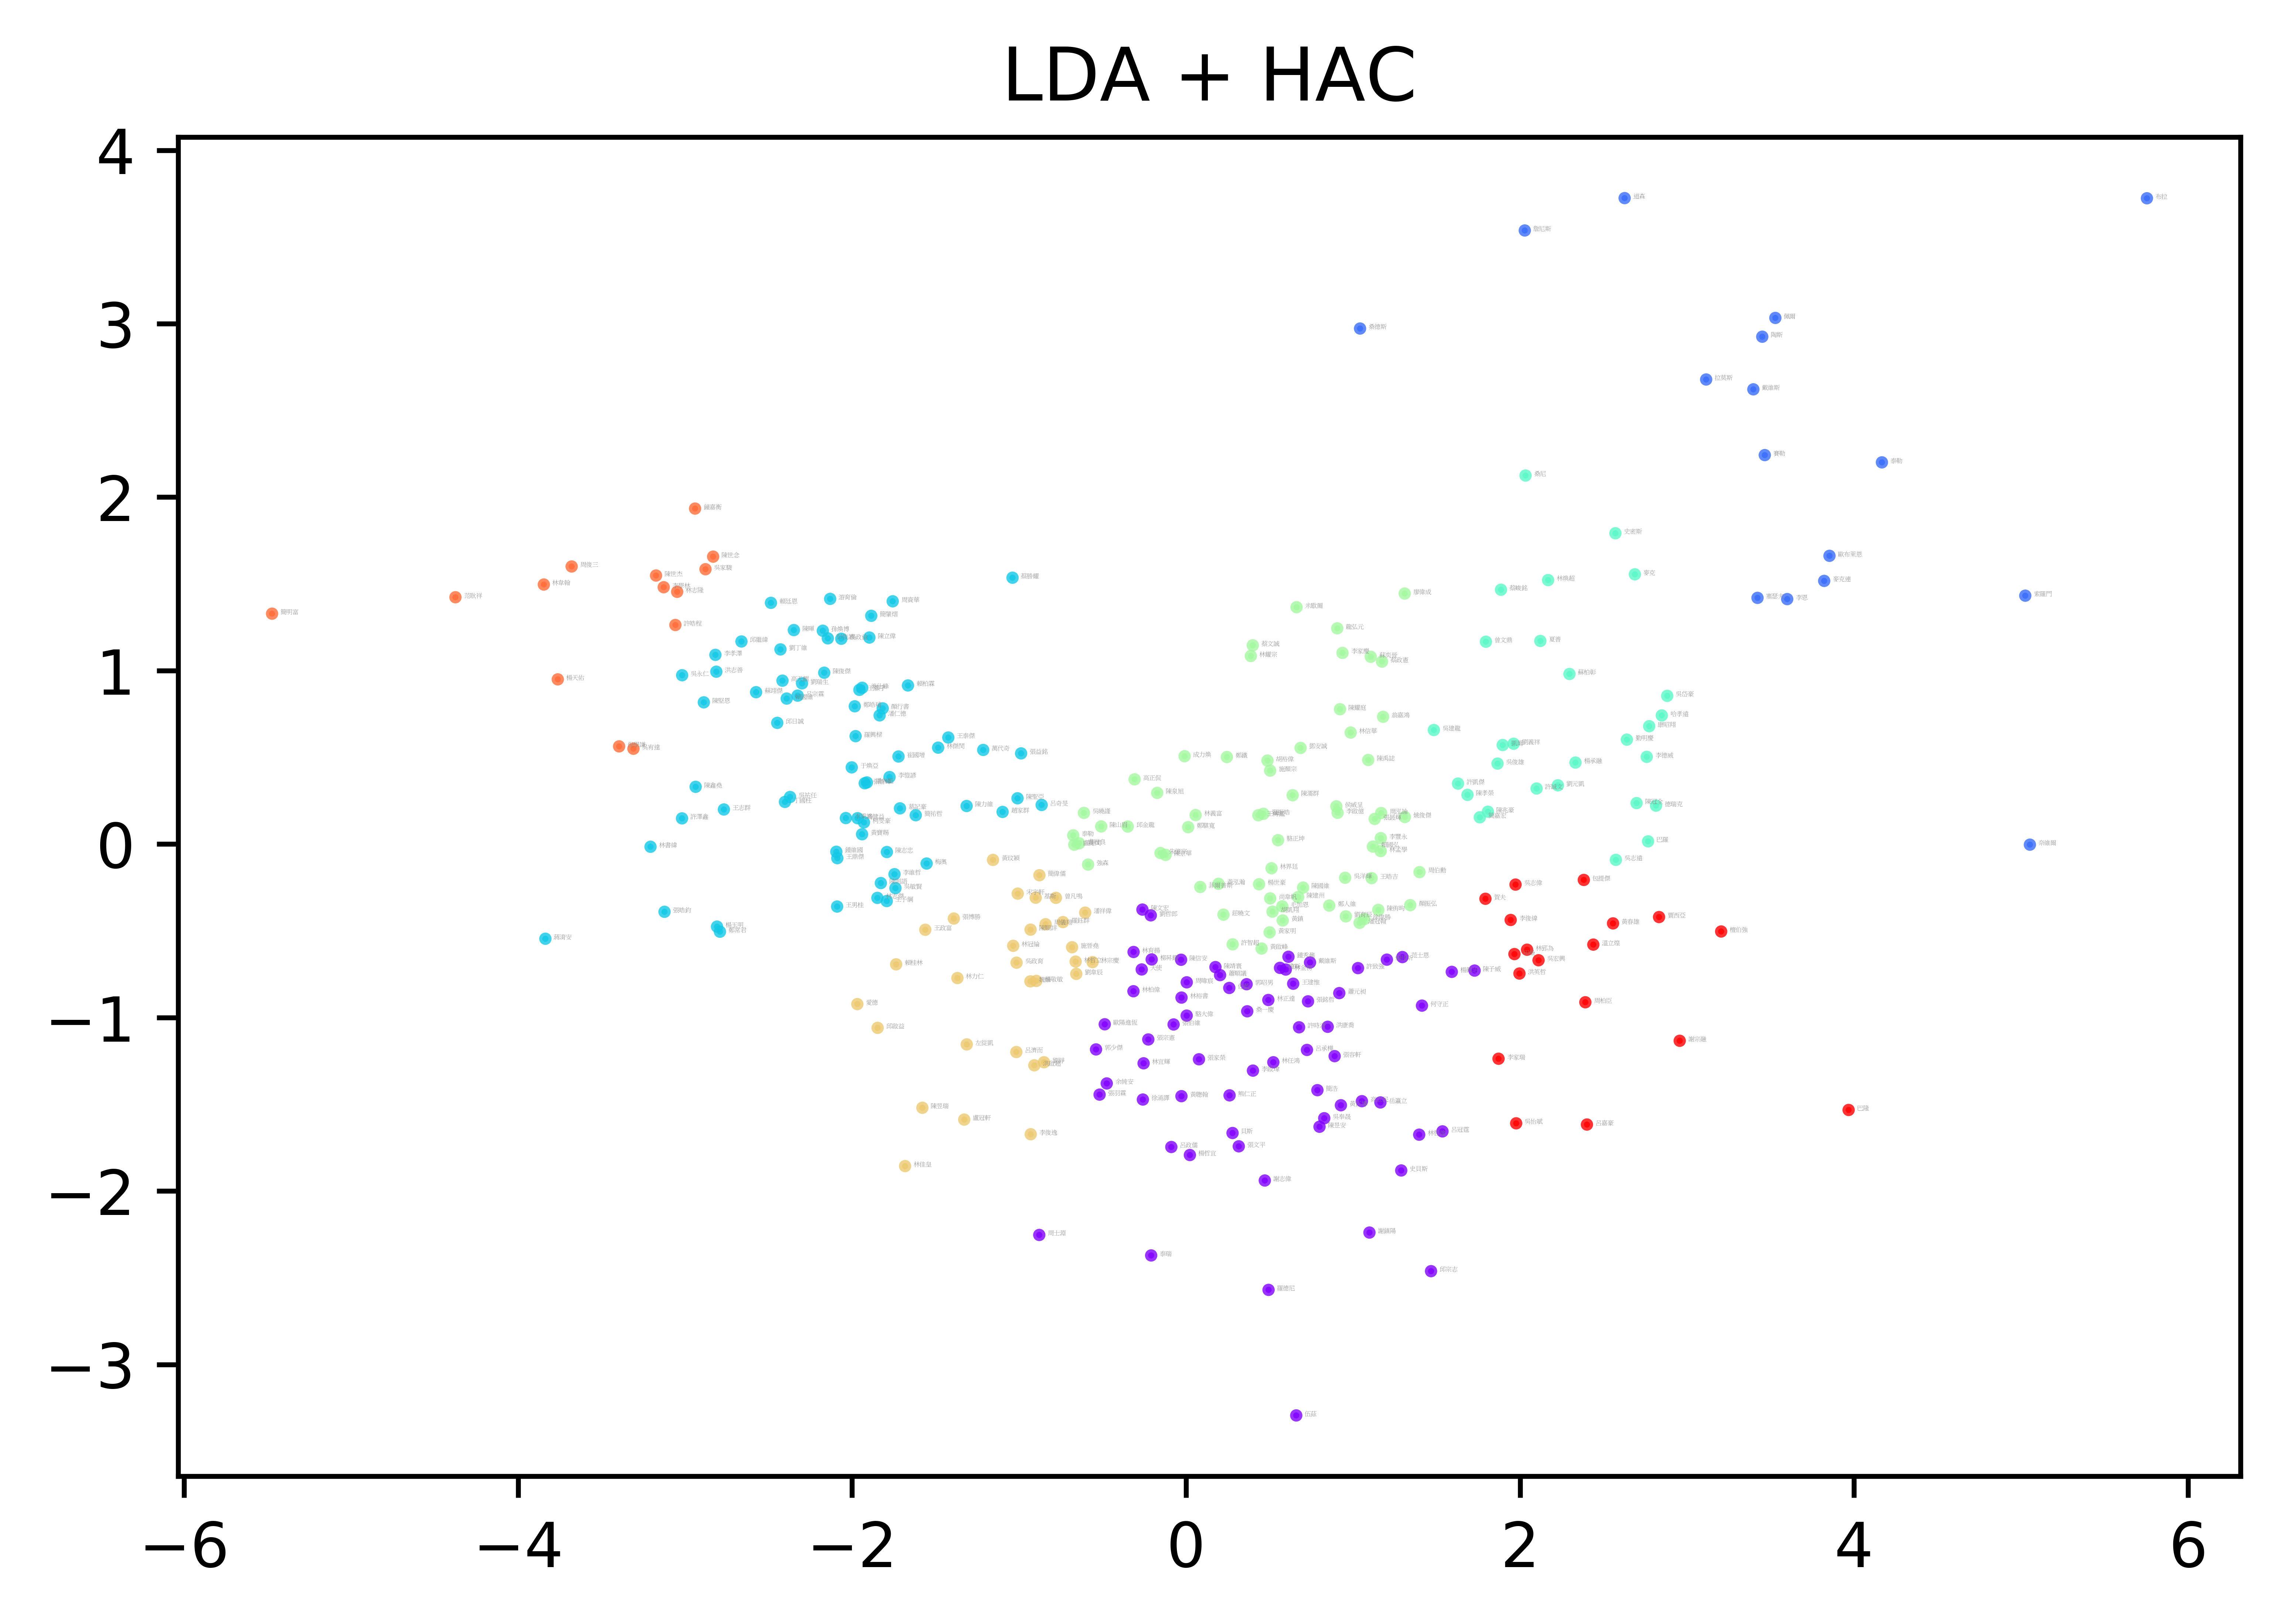

In [95]:
clus_col = colors[df_lda.New_pos.values]

plot_result(df_lda['Dim_1'], df_lda['Dim_2'],
            df_lda['Name'], clus_col, addname = True, fontsize = 1, 
            title = 'LDA + HAC',
            markersize= 1, dpi = 1200, datascale = 1, outfn = 'LDA_HAC.png')

# 5. TSNE + HAC

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 307 samples in 0.000s...
[t-SNE] Computed neighbors for 307 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 307 / 307
[t-SNE] Mean sigma: 0.147266
[t-SNE] KL divergence after 250 iterations with early exaggeration: 186.928635
[t-SNE] KL divergence after 1000 iterations: 0.588436


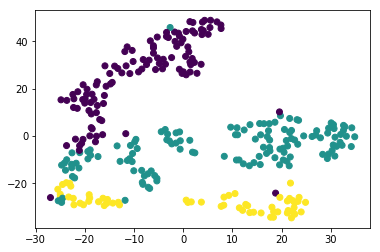

In [96]:
from sklearn.manifold import TSNE

xtrainstd['G'] = df['G'].copy()
xtrainstd['F'] = df['F'].copy()
xtrainstd['C'] = df['C'].copy()

np.random.seed(1001)
tsne_cos = TSNE(n_components=2, early_exaggeration=30, verbose=1, metric = 'cosine', perplexity=10, learning_rate=15)
x_tsne_cos = tsne_cos.fit_transform(xtrainstd)

plt.scatter(x_tsne_cos[:, 0], x_tsne_cos[:, 1],marker='o',c=ytrain, label=ytrain)
plt.show()

In [97]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=8).fit(x_tsne_cos)
clustering.labels_
Pos_new = clustering.labels_

df_tsne_cos = df[['Name']].copy()
df_tsne_cos = pd.concat([df_tsne_cos, pd.DataFrame(x_tsne_cos)], axis=1)
df_tsne_cos['Pos_new'] = Pos_new
df_tsne_cos.columns = ['Name', 'Dim_1', 'Dim_2', 'New_pos']
# df_tsne_cos

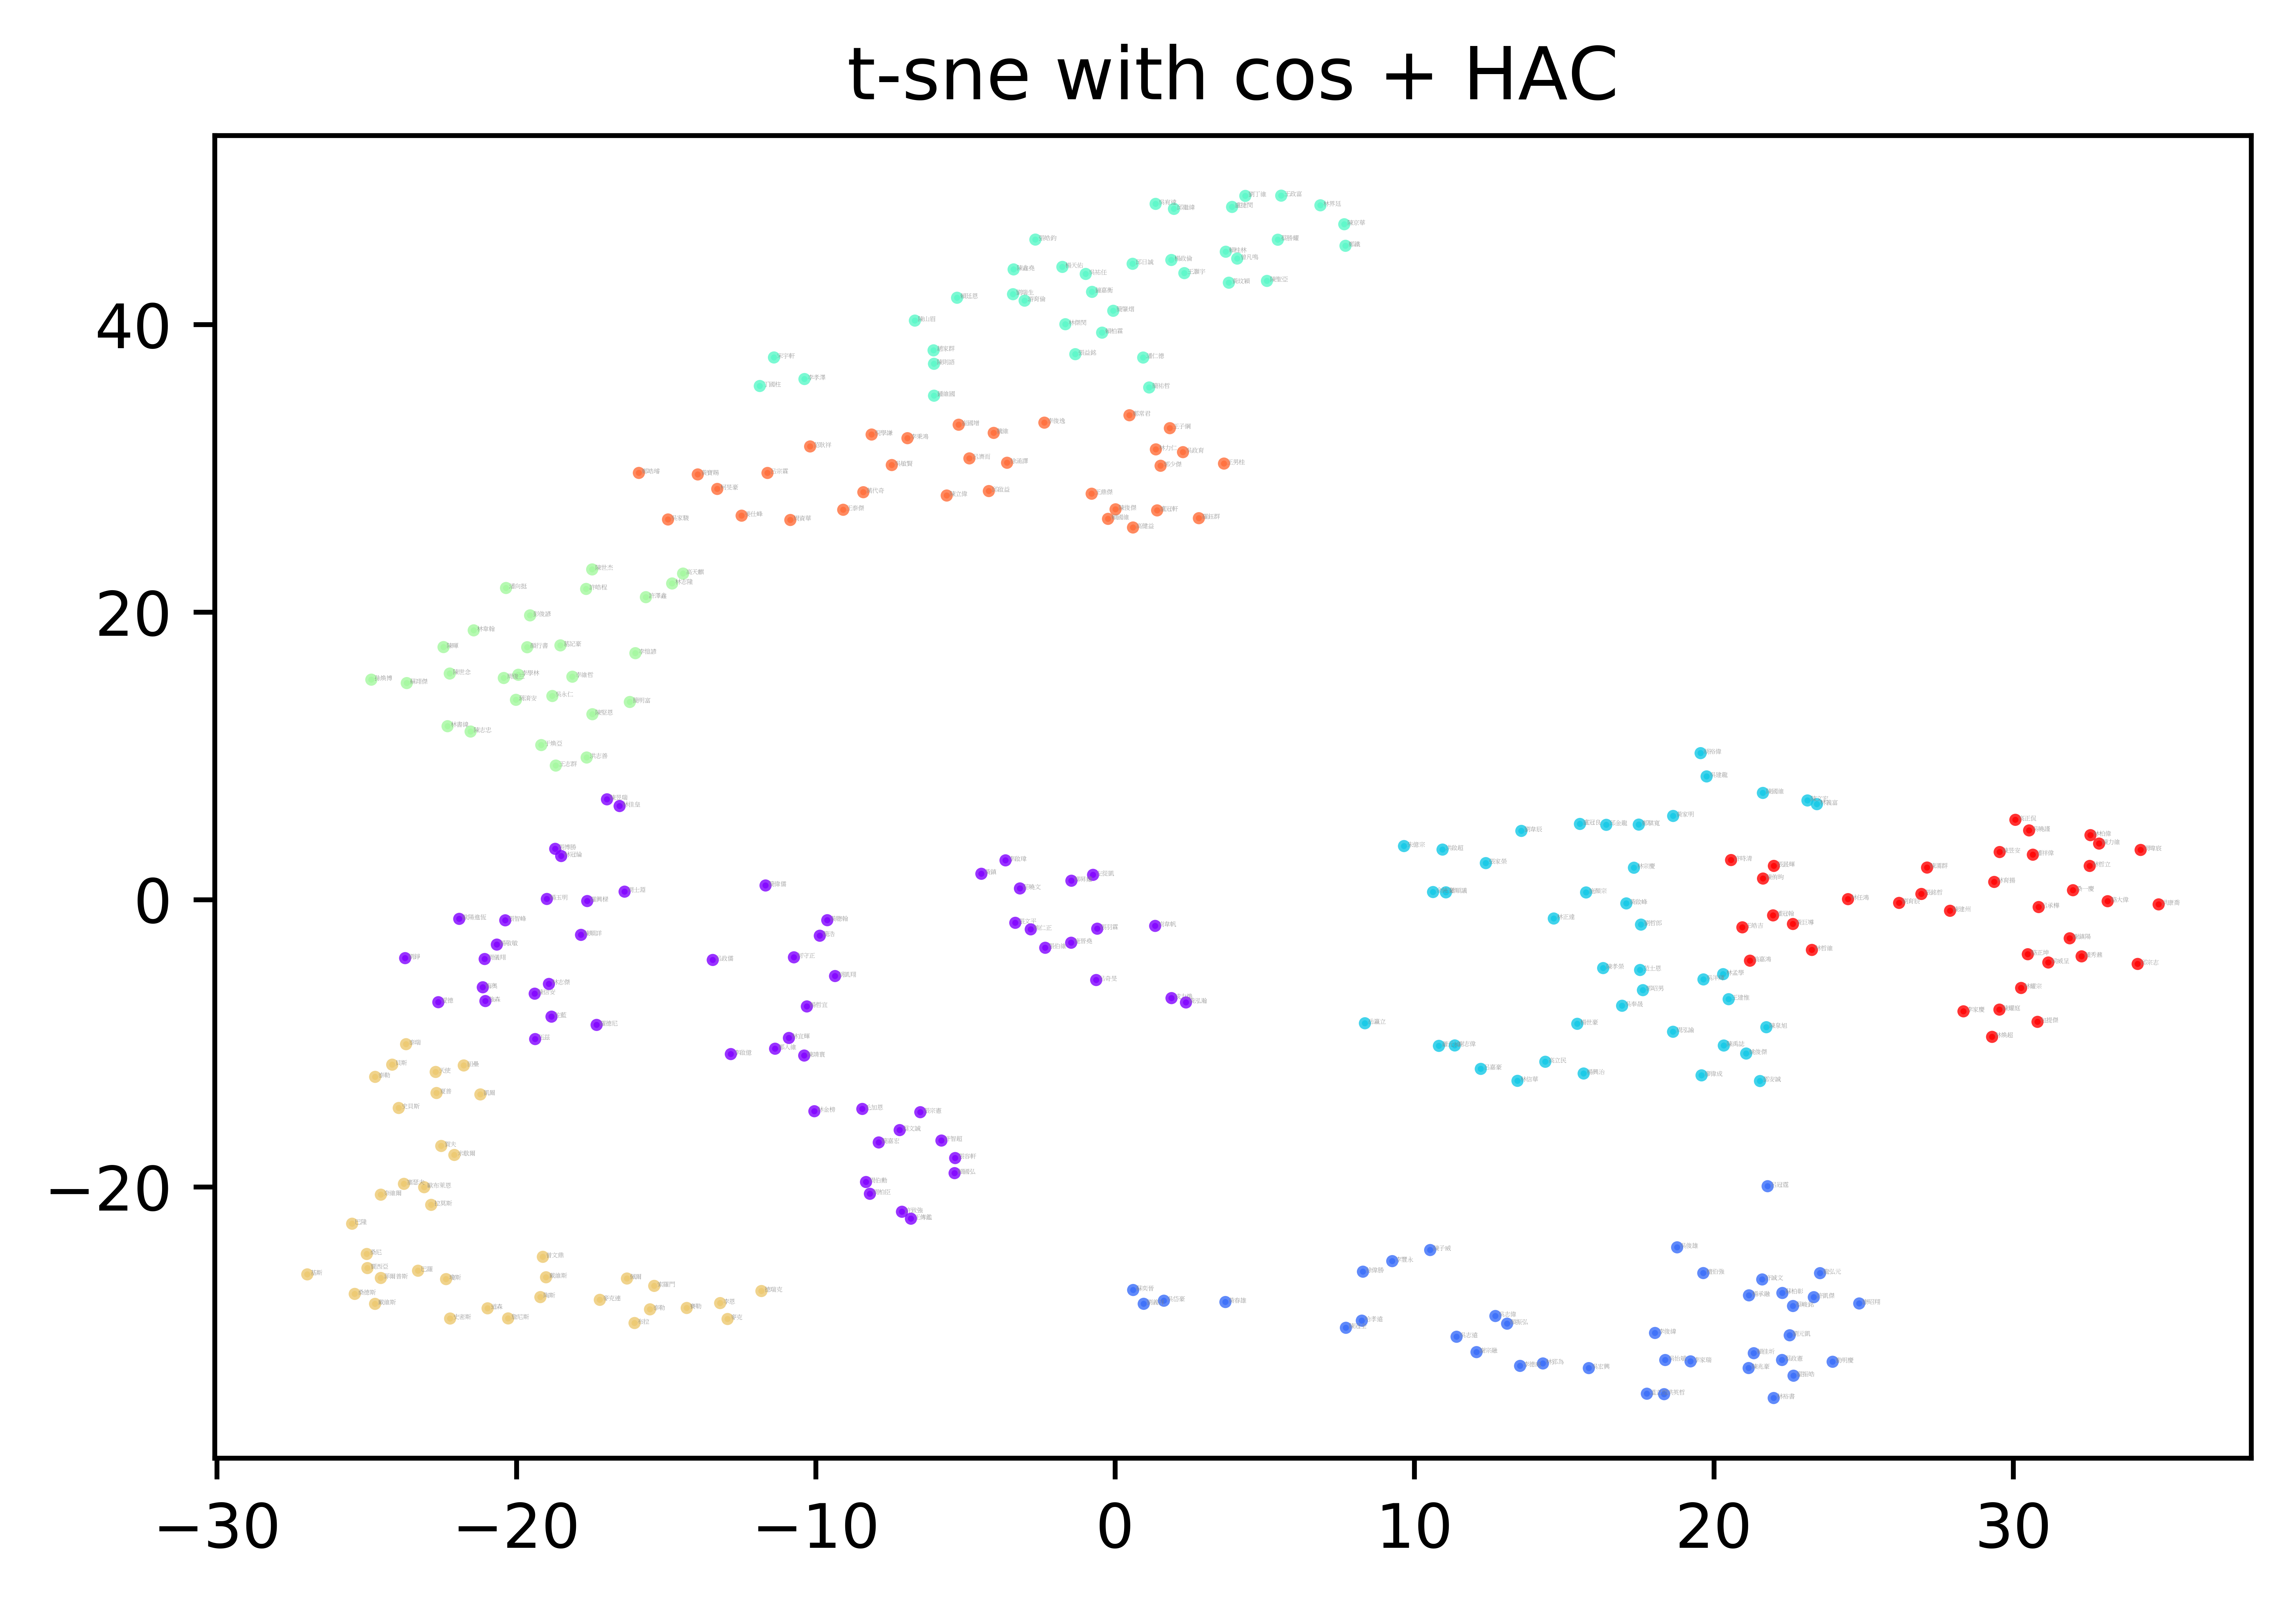

In [98]:
clus_col = colors[df_tsne_cos.New_pos.values]

plot_result(df_tsne_cos['Dim_1'], df_tsne_cos['Dim_2'],
            df_tsne_cos['Name'], clus_col, addname = True, fontsize = 1, 
            title = 't-sne with cos + HAC',
            markersize= 1, dpi = 1200, datascale = 1, outfn = 'tsnecos_HAC.png', nameshift = 0.1)

# 6. PCA + HAC

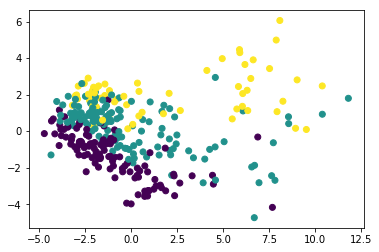

In [99]:
# pca + k-means
xtrainstd

from sklearn.decomposition import PCA 
pca=PCA(n_components=2, copy=True)
x_pca=pca.fit_transform(xtrainstd)
plt.scatter(x_pca[:, 0], x_pca[:, 1],marker='o',c=ytrain, label=ytrain)
plt.show()

In [100]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=8).fit(x_pca)
clustering.labels_
Pos_new = clustering.labels_

df_pca = df[['Name']].copy()
df_pca = pd.concat([df_pca, pd.DataFrame(x_pca)], axis=1)
df_pca['Pos_new'] = Pos_new
df_pca.columns = ['Name', 'Dim_1', 'Dim_2', 'New_pos']
# df_pca

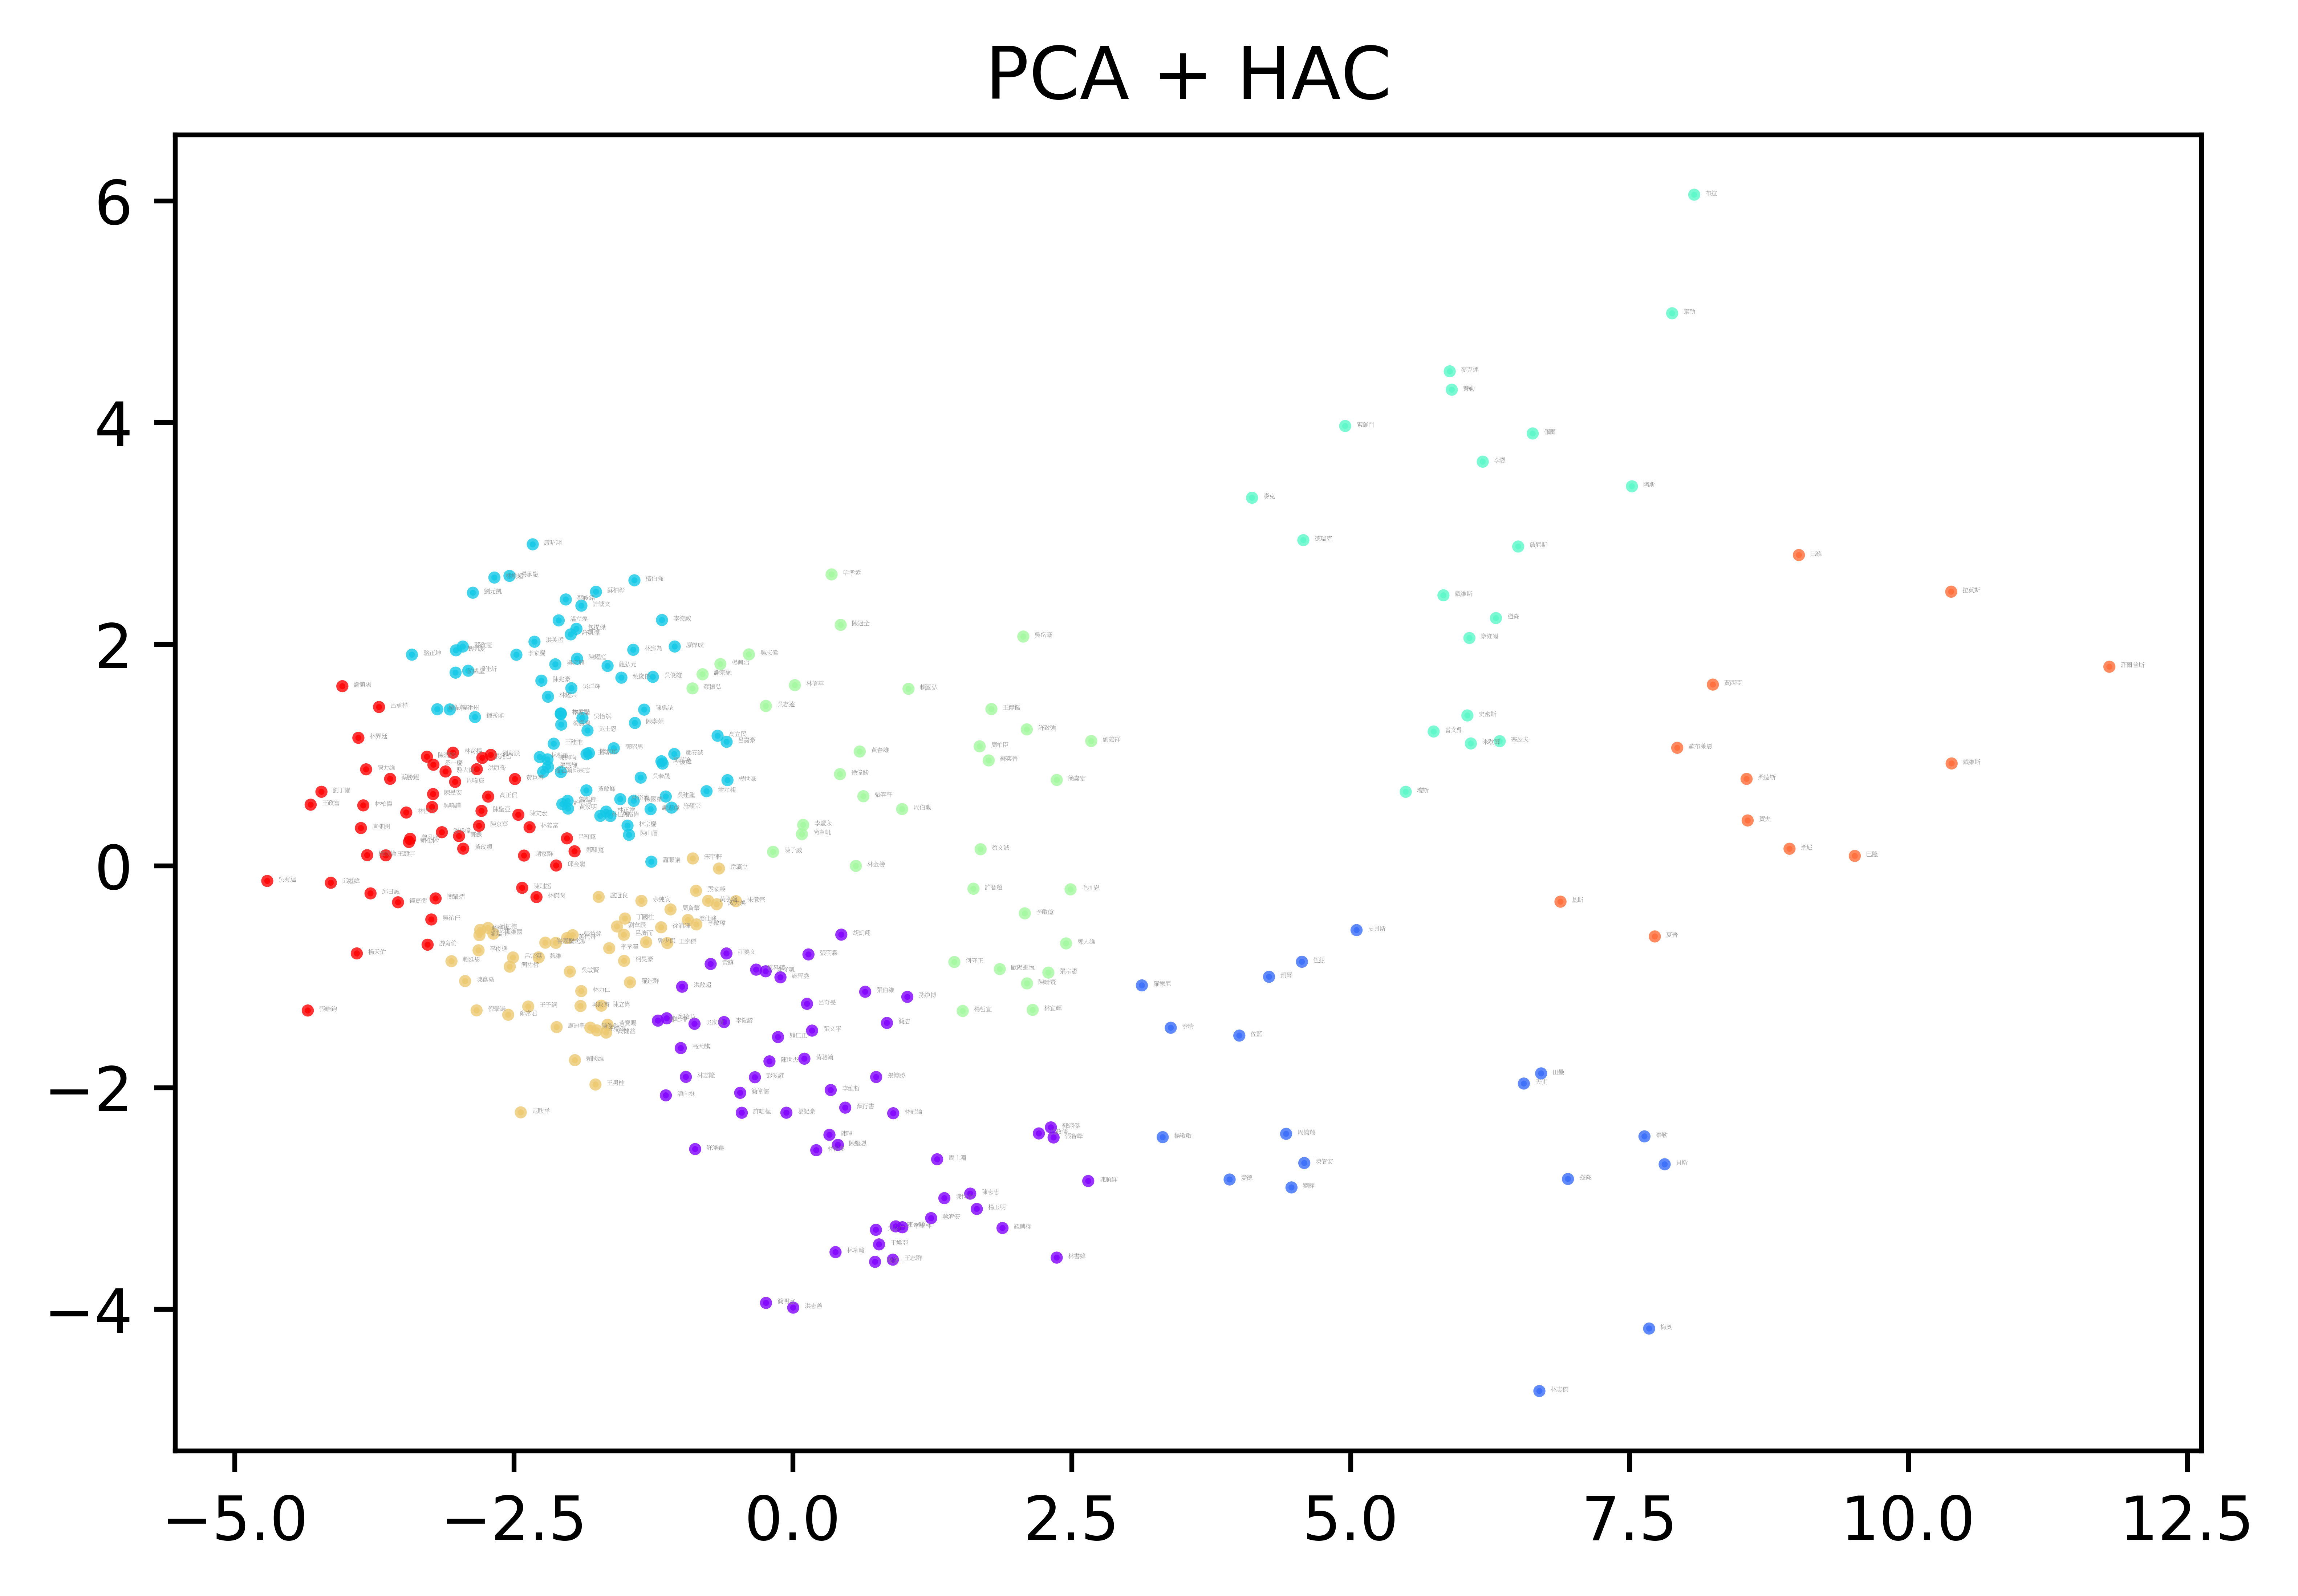

In [101]:
clus_col = colors[df_pca.New_pos.values]

plot_result(df_pca['Dim_1'], df_pca['Dim_2'],
            df_pca['Name'], clus_col, addname = True, fontsize = 1, 
            title = 'PCA + HAC',
            markersize= 1, dpi = 1200, datascale = 1, outfn = 'PCA_HAC.png', nameshift = 0.1)